🎯 Desafio dia 81 — Acompanhamento de Aulas em Plataforma EAD

📂 Dataset: desafio_dia_81_plataforma_ead.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Você foi contratado por uma plataforma de ensino a distância para analisar como os alunos estão consumindo os módulos das aulas. O objetivo é identificar padrões de comportamento e avaliar o engajamento.

🛠️ Tarefas do desafio:

🧹 Tratamento de dados
- Preencha os valores ausentes em tempo_total_min com a média da coluna.

- Preencha os valores ausentes em avaliacao com a moda da coluna.

📊 Análise geral
- Qual módulo possui mais aulas com status “Concluída”?

- Qual é o tempo médio assistido por status da aula?

📈 Visualização de dados
- Crie um gráfico de boxplot do tempo total de aula (tempo_total_min) por módulo.

🤖 Machine Learning - Regressão
- Crie um modelo de regressão para prever a avaliacao com base nas colunas:

tempo_total_min, modulo, status_aula

Use:

train_test_split

get_dummies

RandomForestRegressor

Avalie o desempenho com mean_squared_error.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_81_plataforma_ead.csv")
df.head()

,id_aluno,modulo,tempo_total_min,status_aula,avaliacao
0,1068,Matemática,46.9,Pendente,5.0
1,1066,Matemática,74.9,Em andamento,4.0
2,1057,História,56.8,Concluída,2.0
3,1047,Matemática,NaN,Em andamento,4.0
4,1076,Português,80.5,Em andamento,4.0


In [3]:
#Preencha os valores ausentes em tempo_total_min com a média da coluna.
df["tempo_total_min"] = df["tempo_total_min"].fillna(df["tempo_total_min"].mean())
df["tempo_total_min"].isna().sum()

0

In [4]:
#Preencha os valores ausentes em avaliacao com a moda da coluna.
df["avaliacao"] = df["avaliacao"].fillna(df["avaliacao"].mode()[0])
df["avaliacao"].isna().sum()

0

In [7]:
#Qual módulo possui mais aulas com status “Concluída”?
modulo_status_concluida = df[df["status_aula"] == "Concluída"]["modulo"].value_counts()
print(modulo_status_concluida)

modulo
Matemática    56
Português     53
Inglês        49
Química       48
História      47
Física        47
Name: count, dtype: int64


In [8]:
#Qual é o tempo médio assistido por status da aula?
tempo_medio_status_aula = df.groupby("status_aula")["tempo_total_min"].mean()
print(tempo_medio_status_aula)

status_aula
Concluída       59.644881
Em andamento    61.827410
Pendente        59.684565
Name: tempo_total_min, dtype: float64


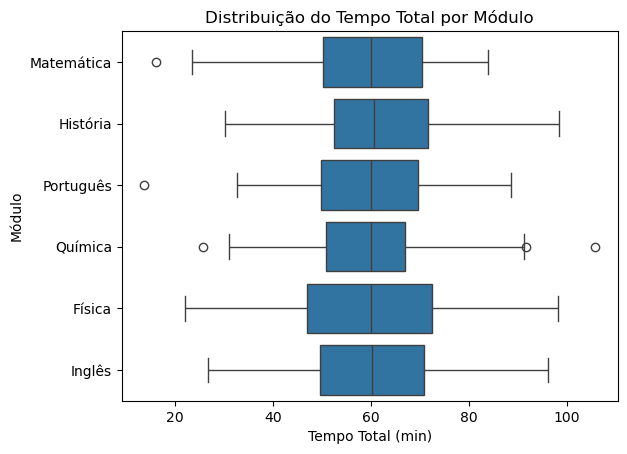

In [12]:
#Crie um gráfico de boxplot do tempo total de aula (tempo_total_min) por módulo.
sns.boxplot(df, x="tempo_total_min", y="modulo")
plt.title("Distribuição do Tempo Total por Módulo")
plt.ylabel("Módulo")
plt.xlabel("Tempo Total (min)")
plt.show()

In [15]:
#Crie um modelo de regressão para prever a avaliacao com base nas colunas:
X = df[["tempo_total_min", "modulo", "status_aula"]]
y = df["avaliacao"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.1618632096532504
